<a href="https://colab.research.google.com/github/SelvaKathir-DataAnalytics/Data-Analyst-Portfolio/blob/main/Sample_programs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
# Step 3: Create a sample DataFrame
data = {
 'Name': ['Alice', 'Bob', 'Charlie'],
 'Age': [25, 30, 35],
 'City': ['New York', 'Los Angeles', 'Chicago']
}
df = pd.DataFrame(data)
# Step 4: Save DataFrame to different formats
df.to_csv('sample_data.csv', index=False)
df.to_excel('sample_data.xlsx', index=False)
df.to_json('sample_data.json', orient='records', lines=True)
df.to_html('sample_data.html', index=False)
print(" Data saved in CSV, Excel, JSON, and HTML formats.")
# Step 5: Read data back from each format
df_csv = pd.read_csv('sample_data.csv')
df_excel = pd.read_excel('sample_data.xlsx')
df_json = pd.read_json('sample_data.json', lines=True)
df_html = pd.read_html('sample_data.html')[0] # read_html returns a list of tables
# Step 6: Display the loaded DataFrames
print("\n CSV Data:")
print(df_csv)
print("\n Excel Data:")
print(df_excel)
print("\n JSON Data:")
print(df_json)
print("\n HTML Data:")
print(df_html)

 Data saved in CSV, Excel, JSON, and HTML formats.

 CSV Data:
      Name  Age         City
0    Alice   25     New York
1      Bob   30  Los Angeles
2  Charlie   35      Chicago

 Excel Data:
      Name  Age         City
0    Alice   25     New York
1      Bob   30  Los Angeles
2  Charlie   35      Chicago

 JSON Data:
      Name  Age         City
0    Alice   25     New York
1      Bob   30  Los Angeles
2  Charlie   35      Chicago

 HTML Data:
      Name  Age         City
0    Alice   25     New York
1      Bob   30  Los Angeles
2  Charlie   35      Chicago


In [ ]:
# Step 1: Import required libraries
import sqlite3
import pandas as pd
# Step 2: Create an in-memory SQLite database and a sample table
conn = sqlite3.connect(':memory:') # Use 'your_database.db' for file-based DB
cursor = conn.cursor()
# Step 3: Create a table and insert sample data
cursor.execute('''
CREATE TABLE students (
 id INTEGER PRIMARY KEY,
 name TEXT,
 age INTEGER,
 grade TEXT
)
''')
cursor.executemany('''
INSERT INTO students (name, age, grade) VALUES (?, ?, ?)
''', [
 ('Alice', 22, 'A'),
 ('Bob', 23, 'B'),
 ('Charlie', 24, 'A')
])
conn.commit()
# Step 4: Run a SQL query and load results into a DataFrame
query = "SELECT * FROM students WHERE grade = 'A'"
df = pd.read_sql_query(query, conn)
# Step 5: Display the DataFrame
print(" Students with grade A:")
print(df)
# Step 6: Close the connection
conn.close()

 Students with grade A:
   id     name  age grade
0   1    Alice   22     A
1   3  Charlie   24     A


In [ ]:
# Step 1: Import pandas
import pandas as pd
# Step 2: Create a sample DataFrame with missing and duplicate values
data = {
 'Name': ['Alice', 'Bob', 'Charlie', 'Alice', None],
 'Age': [25, None, 35, 25, 30],
 'City': ['New York', 'Los Angeles', 'Chicago', 'New York', 'Chicago']
}
df = pd.DataFrame(data)
print(" Original DataFrame:")
print(df)
# Step 3: Detect missing values
print("\n Missing Values (True indicates missing):")
print(df.isnull())
# Step 4: Drop rows with any missing values
df_dropna = df.dropna()
print("\n DataFrame after dropping rows with missing values:")
print(df_dropna)
# Step 5: Fill missing values with default values
df_fillna = df.fillna({'Name': 'Unknown', 'Age': df['Age'].mean()})
print("\n DataFrame after filling missing values:")
print(df_fillna)
# Step 6: Detect duplicate rows
print("\n Duplicate Rows (True indicates duplicate):")
print(df.duplicated())
# Step 7: Remove duplicate rows
df_nodup = df.drop_duplicates()
print("\n DataFrame after removing duplicates:")
print(df_nodup)

 Original DataFrame:
      Name   Age         City
0    Alice  25.0     New York
1      Bob   NaN  Los Angeles
2  Charlie  35.0      Chicago
3    Alice  25.0     New York
4     None  30.0      Chicago

 Missing Values (True indicates missing):
    Name    Age   City
0  False  False  False
1  False   True  False
2  False  False  False
3  False  False  False
4   True  False  False

 DataFrame after dropping rows with missing values:
      Name   Age      City
0    Alice  25.0  New York
2  Charlie  35.0   Chicago
3    Alice  25.0  New York

 DataFrame after filling missing values:
      Name    Age         City
0    Alice  25.00     New York
1      Bob  28.75  Los Angeles
2  Charlie  35.00      Chicago
3    Alice  25.00     New York
4  Unknown  30.00      Chicago

 Duplicate Rows (True indicates duplicate):
0    False
1    False
2    False
3     True
4    False
dtype: bool

 DataFrame after removing duplicates:
      Name   Age         City
0    Alice  25.0     New York
1      Bob   NaN  

In [ ]:
# Step 1: Import pandas
import pandas as pd
# Step 2: Create sample data with hierarchical row index
data = {
 'Math': [85, 90, 78, 88],
 'Science': [92, 85, 80, 89]
}
# Define multi-level row index: (Class, Student)
index = pd.MultiIndex.from_tuples([
 ('Class A', 'Alice'),
 ('Class A', 'Bob'),
 ('Class B', 'Charlie'),
 ('Class B', 'David')
], names=['Class', 'Student'])
# Step 3: Create DataFrame with hierarchical index
df = pd.DataFrame(data, index=index)
print(" Hierarchical Indexed DataFrame:")
print(df)
# Step 4: Access data using multi-level index
print("\n Scores for Class A:")
print(df.loc['Class A'])
print("\n Science score for Charlie in Class B:")
print(df.loc[('Class B', 'Charlie'), 'Science'])
# Step 5: Swap index levels
df_swapped = df.swaplevel()
print("\n Swapped Index Levels:")
print(df_swapped)
# Step 6: Sort by index
df_sorted = df.sort_index()
print("\n Sorted by Index:")
print(df_sorted)

 Hierarchical Indexed DataFrame:
                 Math  Science
Class   Student               
Class A Alice      85       92
        Bob        90       85
Class B Charlie    78       80
        David      88       89

 Scores for Class A:
         Math  Science
Student               
Alice      85       92
Bob        90       85

 Science score for Charlie in Class B:
80

 Swapped Index Levels:
                 Math  Science
Student Class                 
Alice   Class A    85       92
Bob     Class A    90       85
Charlie Class B    78       80
David   Class B    88       89

 Sorted by Index:
                 Math  Science
Class   Student               
Class A Alice      85       92
        Bob        90       85
Class B Charlie    78       80
        David      88       89


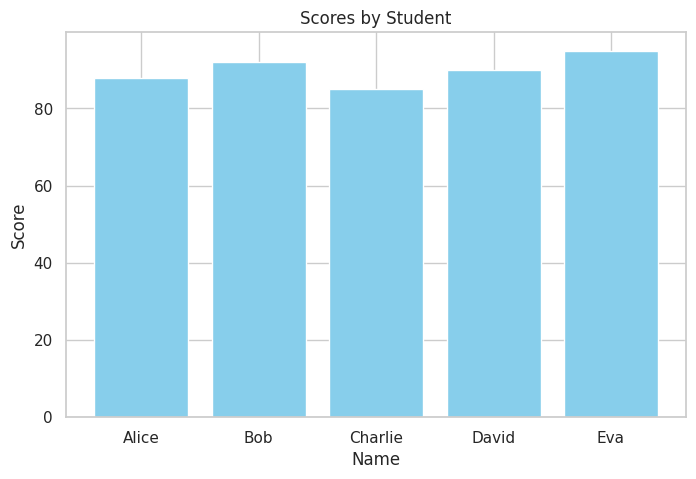

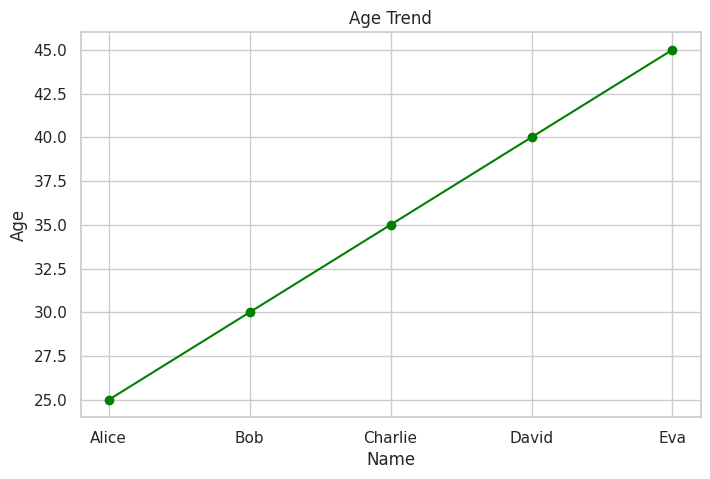

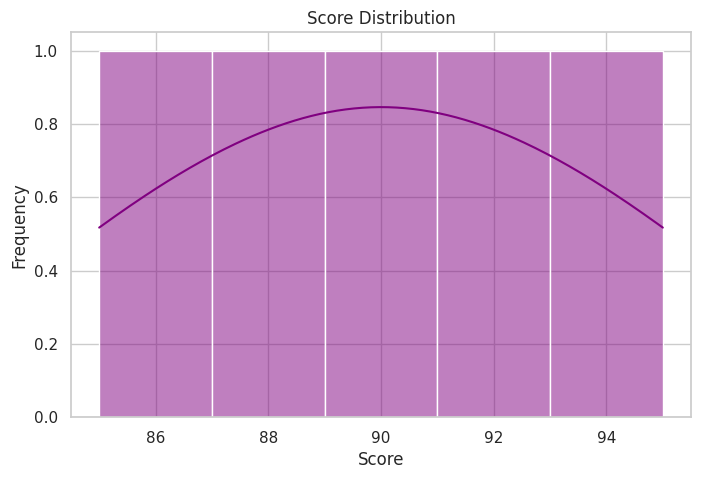

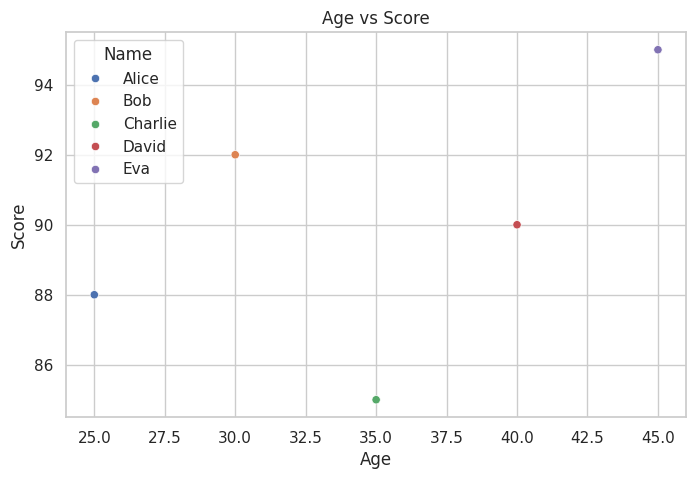

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Step 2: Create sample data
data = {
 'Name': ['Alice', 'Bob', 'Charlie', 'David', 'Eva'],
 'Age': [25, 30, 35, 40, 45],
 'Score': [88, 92, 85, 90, 95]
}
df = pd.DataFrame(data)
# Step 3: Set Seaborn style
sns.set(style="whitegrid")
# Step 4: Bar plot using Matplotlib
plt.figure(figsize=(8, 5))
plt.bar(df['Name'], df['Score'], color='skyblue')
plt.title('Scores by Student')
plt.xlabel('Name')
plt.ylabel('Score')
plt.show()
# Step 5: Line plot using Matplotlib
plt.figure(figsize=(8, 5))
plt.plot(df['Name'], df['Age'], marker='o', linestyle='-', color='green')
plt.title('Age Trend')
plt.xlabel('Name')
plt.ylabel('Age')
plt.show()
# Step 6: Histogram using Seaborn
plt.figure(figsize=(8, 5))
sns.histplot(df['Score'], bins=5, kde=True, color='purple')
plt.title('Score Distribution')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.show()
# Step 7: Scatter plot using Seaborn
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Age', y='Score', data=df, hue='Name', palette='deep')
plt.title('Age vs Score')
plt.xlabel('Age')
plt.ylabel('Score')
plt.show()

In [ ]:
# Step 1: Import pandas
import pandas as pd
# Step 2: Create sample data
data = {
 'Department': ['Sales', 'Sales', 'HR', 'HR', 'IT', 'IT'],
 'Employee': ['Alice', 'Bob', 'Charlie', 'David', 'Eva', 'Frank'],
 'Salary': [50000, 55000, 60000, 62000, 70000, 72000],
 'Experience': [2, 3, 5, 6, 4, 5]
}
df = pd.DataFrame(data)
print("Original Data:")
print(df)
# Step 3: Group by Department and calculate average salary
avg_salary = df.groupby('Department')['Salary'].mean()
print("\n Average Salary by Department:")
print(avg_salary)
# Step 4: Group by Department and apply multiple aggregations
agg_stats = df.groupby('Department').agg({
 'Salary': ['mean', 'max', 'min'],
 'Experience': ['mean', 'sum']
})
print("\n Aggregated Statistics by Department:")
print(agg_stats)
# Step 5: Group by multiple columns
group_multi = df.groupby(['Department', 'Experience']).size()
print("\n Grouped by Department and Experience:")
print(group_multi)
# Step 6: Use custom aggregation function
def salary_range(series):
 return series.max() - series.min()
custom_agg = df.groupby('Department')['Salary'].agg(salary_range)
print("\n Salary Range by Department:")
print(custom_agg)

Original Data:
  Department Employee  Salary  Experience
0      Sales    Alice   50000           2
1      Sales      Bob   55000           3
2         HR  Charlie   60000           5
3         HR    David   62000           6
4         IT      Eva   70000           4
5         IT    Frank   72000           5

 Average Salary by Department:
Department
HR       61000.0
IT       71000.0
Sales    52500.0
Name: Salary, dtype: float64

 Aggregated Statistics by Department:
             Salary               Experience    
               mean    max    min       mean sum
Department                                      
HR          61000.0  62000  60000        5.5  11
IT          71000.0  72000  70000        4.5   9
Sales       52500.0  55000  50000        2.5   5

 Grouped by Department and Experience:
Department  Experience
HR          5             1
            6             1
IT          4             1
            5             1
Sales       2             1
            3             1
dtyp